In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

makenewdata = False

if makenewdata:
    N=50
    muac = np.random.randn(N)*15+113
    muac.sort()
    muac = muac[np.diff(muac)<7]
    N = len(muac)
    ok = ((muac - 108)+(np.random.randn(N)*15))>0
    pickle.dump([muac,ok],open( "example_muac.p", "wb" ))
else:
    example = pickle.load(open( "example_muac.p", "rb" ))
    muac = example[0]
    ok = example[1]
    N = len(muac)

In [15]:
if makenewdata:
    zscore = 3*((ok-0.5)*0.8 - 0.3*((muac - np.mean(muac))/np.std(muac)) + 0.3*np.random.randn(N))
    pickle.dump(zscore,open('example_zscore.p','wb'))
else:
    zscore = pickle.load(open( "example_zscore.p", "rb" ))

In [16]:
print len(muac[ok])
print len(muac[~ok])

29
19


In [17]:
def plotdata(muac,ok,xlim = [80,150],testpoint=115):
    plt.plot(muac[ok],np.ones(np.sum(ok)),'+g',mew=2,markersize=10)
    plt.plot(muac[~ok],np.zeros(np.sum(~ok)),'xr',mew=2,markersize=10)
    plt.ylim([-.5,1.5])
    plt.xlim(xlim)
    plt.xlabel('MUAC / mm')
    frame1 = plt.gca()
    plt.yticks([0,1], ['need\ntreatment','do not\nneed\ntreatment'])
    #frame1.axes.get_yaxis().set_visible(False)
    #frame1.axes.get_yaxis().set_ticks(['Did not recover','Recovered'])
    plt.text(testpoint,0.5,'?',fontsize=14)
    plt.title('MUAC dataset')
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    
def plotroc(muac,ok,threshes,symbol='x',skipnewfig = False):
    if not skipnewfig:
        plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')
    falsepos = []
    trueneg = []
    for t in threshes:
        falsepos.append(np.mean(muac[ok]<t))
        trueneg.append(np.mean(muac[~ok]<t))
    plt.plot(falsepos,trueneg,symbol,lw=3,mew=3,markersize=20)
    #plt.axis('equal')
    margin = 0.01
    plt.xlim([0-margin,1+margin])
    plt.ylim([0-margin,1+margin])
    plt.plot([0,1],[0,1],'k-')
    plt.title('ROC Curve')
    plt.xlabel('Proportion of children who don\'t\nneed treatment who got it (False Positive)')
    plt.ylabel('Proportion of children who\nneed treatment who got it (True Positive)')
    #xticks = range(0,1,0.1)
    #xticks.append(len(muac[ok]))
    #plt.xticks(xticks, xticks)
    
    #yticks = range(0,len(muac[~ok]),2)
    #yticks.append(len(muac[~ok]))
    #plt.yticks(yticks, yticks)
    

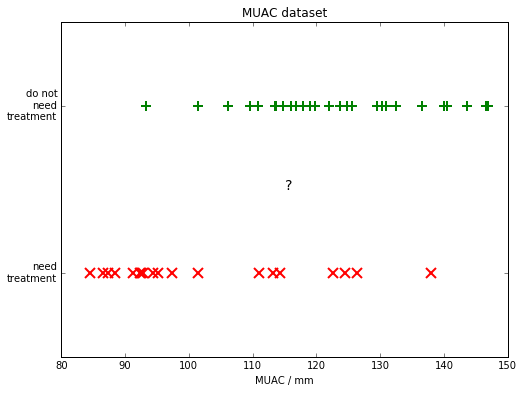

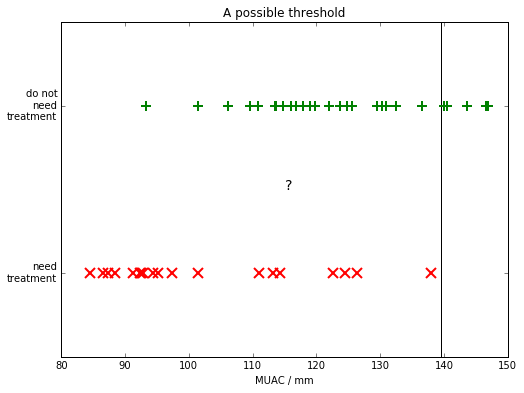

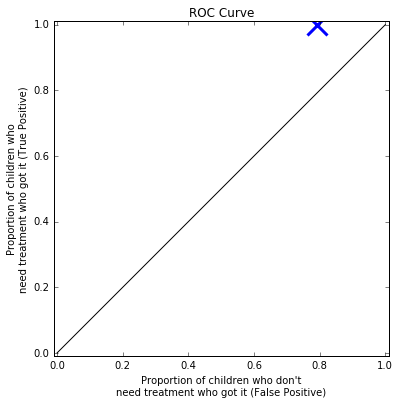

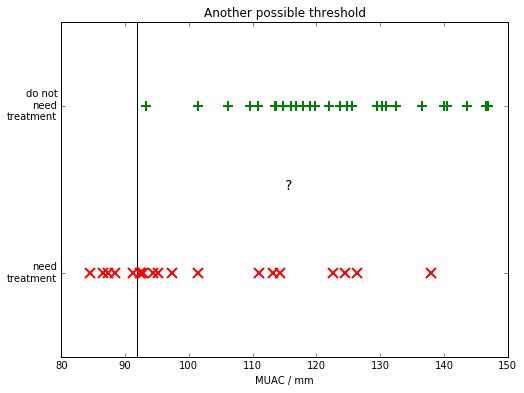

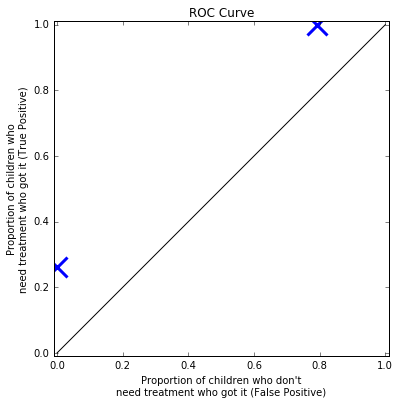

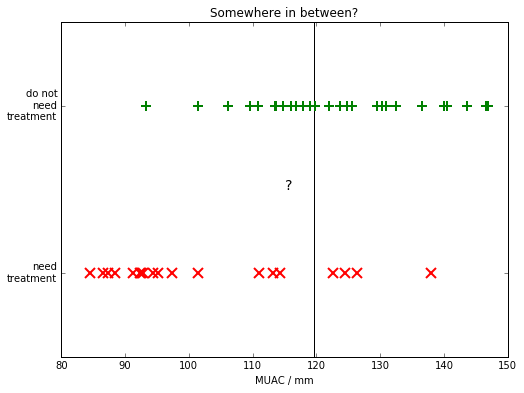

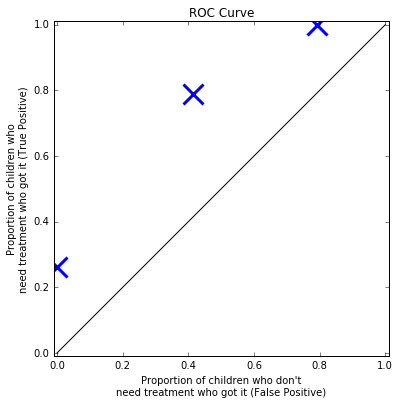

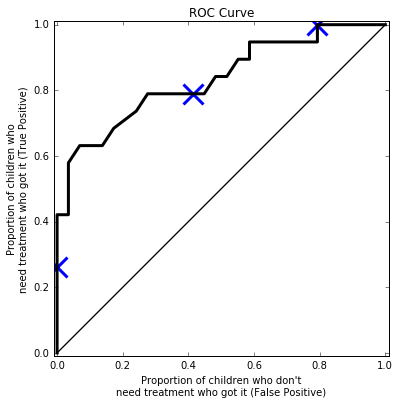

In [18]:
def savefig(filename):
    plt.savefig(filename,bbox_inches='tight',transparent=True)
    
plotdata(muac,ok)
savefig('classify1.png')

threshes = []
plt.figure()
plotdata(muac,ok)
topthresh = np.max(muac[~ok])+1.5
threshes.append(topthresh)
plt.vlines([topthresh],-1,2)
plt.title('A possible threshold')
savefig('classify2.png')

#plt.figure()
plotroc(muac,ok,threshes)
savefig('roc1.png')

plt.figure()
plotdata(muac,ok)
lowthresh = np.min(muac[ok])-1.5
threshes.append(lowthresh)
plt.vlines([lowthresh],-1,2)
plt.title('Another possible threshold')
savefig('classify3.png')

plotroc(muac,ok,threshes)
savefig('roc2.png')

plt.figure()
plotdata(muac,ok)
midthresh = 4+(np.min(muac[ok])+np.max(muac[~ok]))/2 #moved it a little
threshes.append(midthresh)
plt.vlines([midthresh],-1,2)
plt.title('Somewhere in between?')
savefig('classify4.png')

plotroc(muac,ok,threshes)
savefig('roc3.png')

allthreshes = []
#for t in np.arange(np.min(muac[ok])-1,np.max(muac[~ok])+1,1.0):
for t in np.arange(0,200,1.0):
    allthreshes.append(t)

plotroc(muac,ok,threshes)
plotroc(muac,ok,allthreshes,'k-',skipnewfig=True)
savefig('roc4.png')

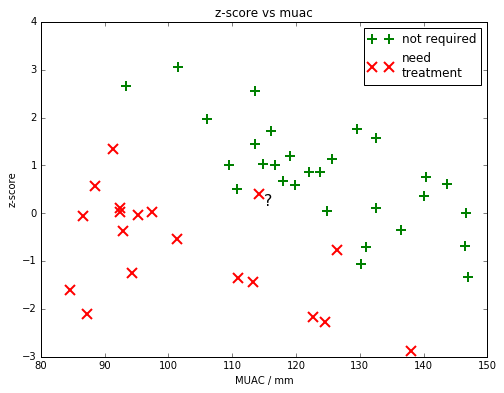

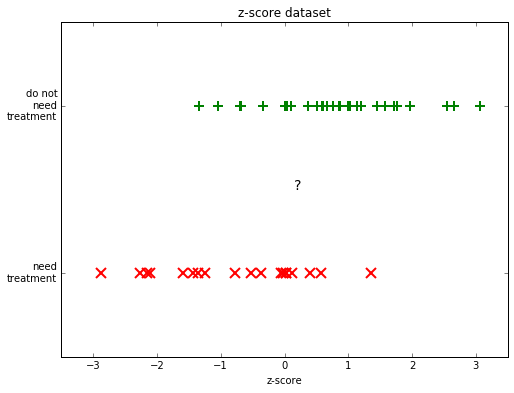

In [19]:
def plotboth():
    plt.title('z-score vs muac')
    plt.plot(muac[ok],zscore[ok],'g+',mew=2,markersize=10,label='not required')
    plt.plot(muac[~ok],zscore[~ok],'xr',mew=2,markersize=10,label='need\ntreatment')
    plt.legend(loc='upper right')
    plt.text(115,0.15,'?',fontsize=16)
    plt.ylabel('z-score')
    plt.xlabel('MUAC / mm')
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    
plotboth()
savefig('both.png')
#plt.plot([-3,2.5],[150,80],'k-')

plt.figure()
plotdata(zscore,ok,xlim=[-3.5,3.5],testpoint=0.15)
plt.title('z-score dataset')
plt.xlabel('z-score')
savefig('zscore.png')

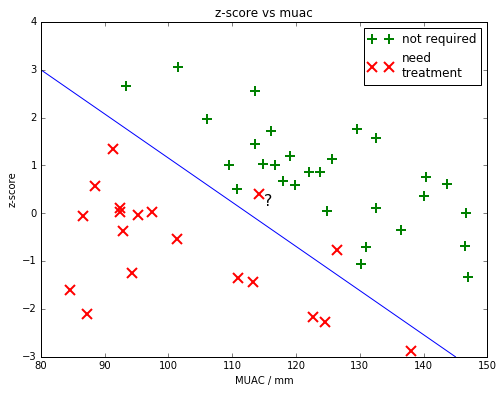

In [20]:
plotboth()
plt.plot([80,145],[3,-3])
savefig('linear.png')

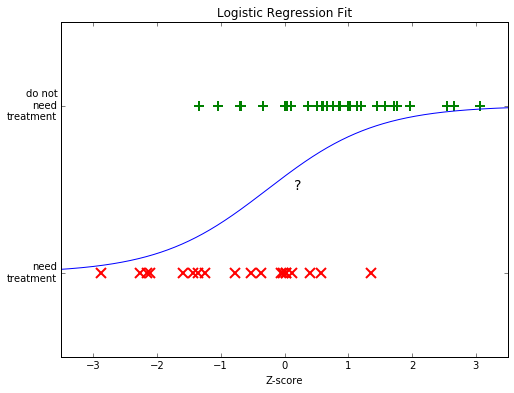

In [63]:
plotdata(zscore,ok,xlim=[-3.5,3.5],testpoint=0.15)
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()

data = zscore[:,None]
target = np.array([1 if k else 0 for k in ok])
m.fit(data,target)
test_muac = np.arange(-5,5,0.01)[:,None]
p = m.predict_proba(test_muac)
plt.plot(test_muac,p[:,1])
#plt.xlim([0,30])
#plt.plot(data,target,'o')
plt.title('Logistic Regression Fit')
plt.xlabel('Z-score')
savefig('logistic')

In [25]:
data = np.vstack([zscore,muac]).T #Here I combine the zscores and MUAC. # <<< Modify for exercise 7
target = np.array([1 if k else 0 for k in ok])

m.fit(t)

/home/lionfish/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [ 1 48]

In [26]:
muac.shape

(48,)